<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Minimization-of-a-function-$f(x)$-using-the-derivative" data-toc-modified-id="Minimization-of-a-function-$f(x)$-using-the-derivative-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Minimization of a function $f(x)$ using the derivative</a></span></li><li><span><a href="#Minimization-of-a-function-$f(x)$-using-the-Gradient-Descend-Algorithm-(GDA)" data-toc-modified-id="Minimization-of-a-function-$f(x)$-using-the-Gradient-Descend-Algorithm-(GDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Minimization of a function $f(x)$ using the Gradient Descend Algorithm (GDA)</a></span></li></ul></div>

## Minimization of a function $f(x)$ using the derivative

Let

$$
f(x) = x^2-3x+2.
$$

To find $x^*=arg min f(x)$ we must solve $f'(x^*)=0$.

$$
f'(x^*) = 2x^*-3 = 0; x^*=2/3.
$$

To find the minimum value of $f(x)$ we substitute $x^*$ in
$$
f(x^*) = -1/4.
$$

## Minimization of a function $f(x)$ using the Gradient Descend Algorithm (GDA)
Requirement: $f(x)$ must be convex, which means that $\nabla^2f$ (the hessian of $f$) is a positive definite matrix, i.e., all the eigenvalues must be larger than 0.

The GDA is an iterative algorithm based on the displacement $x^*$ in the oposite direction of the gradient vector $\nabla f$ (the gradient). Basically:

\begin{equation}
x^*_{(k+1)} = x^*_{(k)} - \alpha_{(k)}\nabla f(x^*_{(k)}),
\end{equation}

where $x^*_{(k)}$ is the value of $x^*$ at the iteration $k$ of the GDA, and $\alpha_{(k)}$ is the *learning rate*.

The smaller the $\alpha_{(k)}$, the better the solution, but the slower the algorithm. In order to keep as high as possible the speed of convergence but, at the same time, have enough accuracy, if

\begin{equation}
f(x^*_{(k+1)})>f(x^*_{(k)}),
\end{equation}

(this would mean that we have "crossed the valley and we are asceding again") then

$$
\alpha_{(k+1)} = \alpha_{(k)}/2.
$$

GDA stops if $\alpha_{(k+1)}<\alpha_{\text{min}}$ or if $\nabla f == 0$.

In [167]:
#import math
def GDA(min_learning_rate = 1e-3, initial_argmin = 1.0):
    learning_rate = 1.0
    argmin = initial_argmin
    iters = 0
    print("{:>6}{:>10}{:>10}{:>10}{:>10}{:>10}".format("iters", "argmin", "f(amin)", "f'(amin)", "rate", "min_rate"))
    while(learning_rate > min_learning_rate):
        iters += 1
        _gradient_f = gradient_f(argmin)
        if _gradient_f == 0.0:
            print("minimum found")
            break
        prev_argmin = argmin
        argmin = argmin - learning_rate * _gradient_f
        if f(argmin) > f(prev_argmin):
            learning_rate /= 2.0
        print(f"{iters:>6}{argmin:>10.2f}{f(argmin):>10.2f}{_gradient_f:>10.2f}{learning_rate:>10.2f}{min_learning_rate:>10.2}")
    return argmin, f(argmin)

In [168]:
import numpy as np
import matplotlib.pyplot as plt

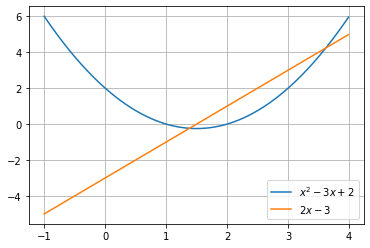

In [169]:
# Example: minimization of f(x) = x^2-3x+2

def f(x):
    return x**2-3*x+2

def gradient_f(x):
    return 2*x-3

xvals = np.arange(-1, 4, 0.01)
yvals = f(xvals)
plt.plot(xvals, yvals, label="$x^2-3x+2$")
yvals2 = gradient_f(xvals)
plt.plot(xvals, yvals2, label="$2x-3$")
plt.grid(True)
plt.legend()
plt.show()

In [170]:
print(GDA())

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1      2.00      0.00     -1.00      1.00     0.001
     2      1.00      0.00      1.00      1.00     0.001
     3      2.00      0.00     -1.00      1.00     0.001
     4      1.00      0.00      1.00      1.00     0.001
     5      2.00      0.00     -1.00      1.00     0.001
     6      1.00      0.00      1.00      1.00     0.001
     7      2.00      0.00     -1.00      1.00     0.001
     8      1.00      0.00      1.00      1.00     0.001
     9      2.00      0.00     -1.00      1.00     0.001
    10      1.00      0.00      1.00      1.00     0.001
    11      2.00      0.00     -1.00      1.00     0.001
    12      1.00      0.00      1.00      1.00     0.001
    13      2.00      0.00     -1.00      1.00     0.001
    14      1.00      0.00      1.00      1.00     0.001
    15      2.00      0.00     -1.00      1.00     0.001
    16      1.00      0.00      1.00      1.00     0.001
    17      2.00      0.00     

   733      2.00      0.00     -1.00      1.00     0.001
   734      1.00      0.00      1.00      1.00     0.001
   735      2.00      0.00     -1.00      1.00     0.001
   736      1.00      0.00      1.00      1.00     0.001
   737      2.00      0.00     -1.00      1.00     0.001
   738      1.00      0.00      1.00      1.00     0.001
   739      2.00      0.00     -1.00      1.00     0.001
   740      1.00      0.00      1.00      1.00     0.001
   741      2.00      0.00     -1.00      1.00     0.001
   742      1.00      0.00      1.00      1.00     0.001
   743      2.00      0.00     -1.00      1.00     0.001
   744      1.00      0.00      1.00      1.00     0.001
   745      2.00      0.00     -1.00      1.00     0.001
   746      1.00      0.00      1.00      1.00     0.001
   747      2.00      0.00     -1.00      1.00     0.001
   748      1.00      0.00      1.00      1.00     0.001
   749      2.00      0.00     -1.00      1.00     0.001
   750      1.00      0.00     

  1366      1.00      0.00      1.00      1.00     0.001
  1367      2.00      0.00     -1.00      1.00     0.001
  1368      1.00      0.00      1.00      1.00     0.001
  1369      2.00      0.00     -1.00      1.00     0.001
  1370      1.00      0.00      1.00      1.00     0.001
  1371      2.00      0.00     -1.00      1.00     0.001
  1372      1.00      0.00      1.00      1.00     0.001
  1373      2.00      0.00     -1.00      1.00     0.001
  1374      1.00      0.00      1.00      1.00     0.001
  1375      2.00      0.00     -1.00      1.00     0.001
  1376      1.00      0.00      1.00      1.00     0.001
  1377      2.00      0.00     -1.00      1.00     0.001
  1378      1.00      0.00      1.00      1.00     0.001
  1379      2.00      0.00     -1.00      1.00     0.001
  1380      1.00      0.00      1.00      1.00     0.001
  1381      2.00      0.00     -1.00      1.00     0.001
  1382      1.00      0.00      1.00      1.00     0.001
  1383      2.00      0.00     

  2044      1.00      0.00      1.00      1.00     0.001
  2045      2.00      0.00     -1.00      1.00     0.001
  2046      1.00      0.00      1.00      1.00     0.001
  2047      2.00      0.00     -1.00      1.00     0.001
  2048      1.00      0.00      1.00      1.00     0.001
  2049      2.00      0.00     -1.00      1.00     0.001
  2050      1.00      0.00      1.00      1.00     0.001
  2051      2.00      0.00     -1.00      1.00     0.001
  2052      1.00      0.00      1.00      1.00     0.001
  2053      2.00      0.00     -1.00      1.00     0.001
  2054      1.00      0.00      1.00      1.00     0.001
  2055      2.00      0.00     -1.00      1.00     0.001
  2056      1.00      0.00      1.00      1.00     0.001
  2057      2.00      0.00     -1.00      1.00     0.001
  2058      1.00      0.00      1.00      1.00     0.001
  2059      2.00      0.00     -1.00      1.00     0.001
  2060      1.00      0.00      1.00      1.00     0.001
  2061      2.00      0.00     

  2725      2.00      0.00     -1.00      1.00     0.001
  2726      1.00      0.00      1.00      1.00     0.001
  2727      2.00      0.00     -1.00      1.00     0.001
  2728      1.00      0.00      1.00      1.00     0.001
  2729      2.00      0.00     -1.00      1.00     0.001
  2730      1.00      0.00      1.00      1.00     0.001
  2731      2.00      0.00     -1.00      1.00     0.001
  2732      1.00      0.00      1.00      1.00     0.001
  2733      2.00      0.00     -1.00      1.00     0.001
  2734      1.00      0.00      1.00      1.00     0.001
  2735      2.00      0.00     -1.00      1.00     0.001
  2736      1.00      0.00      1.00      1.00     0.001
  2737      2.00      0.00     -1.00      1.00     0.001
  2738      1.00      0.00      1.00      1.00     0.001
  2739      2.00      0.00     -1.00      1.00     0.001
  2740      1.00      0.00      1.00      1.00     0.001
  2741      2.00      0.00     -1.00      1.00     0.001
  2742      1.00      0.00     

  3369      2.00      0.00     -1.00      1.00     0.001
  3370      1.00      0.00      1.00      1.00     0.001
  3371      2.00      0.00     -1.00      1.00     0.001
  3372      1.00      0.00      1.00      1.00     0.001
  3373      2.00      0.00     -1.00      1.00     0.001
  3374      1.00      0.00      1.00      1.00     0.001
  3375      2.00      0.00     -1.00      1.00     0.001
  3376      1.00      0.00      1.00      1.00     0.001
  3377      2.00      0.00     -1.00      1.00     0.001
  3378      1.00      0.00      1.00      1.00     0.001
  3379      2.00      0.00     -1.00      1.00     0.001
  3380      1.00      0.00      1.00      1.00     0.001
  3381      2.00      0.00     -1.00      1.00     0.001
  3382      1.00      0.00      1.00      1.00     0.001
  3383      2.00      0.00     -1.00      1.00     0.001
  3384      1.00      0.00      1.00      1.00     0.001
  3385      2.00      0.00     -1.00      1.00     0.001
  3386      1.00      0.00     

  3565      2.00      0.00     -1.00      1.00     0.001
  3566      1.00      0.00      1.00      1.00     0.001
  3567      2.00      0.00     -1.00      1.00     0.001
  3568      1.00      0.00      1.00      1.00     0.001
  3569      2.00      0.00     -1.00      1.00     0.001
  3570      1.00      0.00      1.00      1.00     0.001
  3571      2.00      0.00     -1.00      1.00     0.001
  3572      1.00      0.00      1.00      1.00     0.001
  3573      2.00      0.00     -1.00      1.00     0.001
  3574      1.00      0.00      1.00      1.00     0.001
  3575      2.00      0.00     -1.00      1.00     0.001
  3576      1.00      0.00      1.00      1.00     0.001
  3577      2.00      0.00     -1.00      1.00     0.001
  3578      1.00      0.00      1.00      1.00     0.001
  3579      2.00      0.00     -1.00      1.00     0.001
  3580      1.00      0.00      1.00      1.00     0.001
  3581      2.00      0.00     -1.00      1.00     0.001
  3582      1.00      0.00     

  4227      2.00      0.00     -1.00      1.00     0.001
  4228      1.00      0.00      1.00      1.00     0.001
  4229      2.00      0.00     -1.00      1.00     0.001
  4230      1.00      0.00      1.00      1.00     0.001
  4231      2.00      0.00     -1.00      1.00     0.001
  4232      1.00      0.00      1.00      1.00     0.001
  4233      2.00      0.00     -1.00      1.00     0.001
  4234      1.00      0.00      1.00      1.00     0.001
  4235      2.00      0.00     -1.00      1.00     0.001
  4236      1.00      0.00      1.00      1.00     0.001
  4237      2.00      0.00     -1.00      1.00     0.001
  4238      1.00      0.00      1.00      1.00     0.001
  4239      2.00      0.00     -1.00      1.00     0.001
  4240      1.00      0.00      1.00      1.00     0.001
  4241      2.00      0.00     -1.00      1.00     0.001
  4242      1.00      0.00      1.00      1.00     0.001
  4243      2.00      0.00     -1.00      1.00     0.001
  4244      1.00      0.00     

  4830      1.00      0.00      1.00      1.00     0.001
  4831      2.00      0.00     -1.00      1.00     0.001
  4832      1.00      0.00      1.00      1.00     0.001
  4833      2.00      0.00     -1.00      1.00     0.001
  4834      1.00      0.00      1.00      1.00     0.001
  4835      2.00      0.00     -1.00      1.00     0.001
  4836      1.00      0.00      1.00      1.00     0.001
  4837      2.00      0.00     -1.00      1.00     0.001
  4838      1.00      0.00      1.00      1.00     0.001
  4839      2.00      0.00     -1.00      1.00     0.001
  4840      1.00      0.00      1.00      1.00     0.001
  4841      2.00      0.00     -1.00      1.00     0.001
  4842      1.00      0.00      1.00      1.00     0.001
  4843      2.00      0.00     -1.00      1.00     0.001
  4844      1.00      0.00      1.00      1.00     0.001
  4845      2.00      0.00     -1.00      1.00     0.001
  4846      1.00      0.00      1.00      1.00     0.001
  4847      2.00      0.00     

  5438      1.00      0.00      1.00      1.00     0.001
  5439      2.00      0.00     -1.00      1.00     0.001
  5440      1.00      0.00      1.00      1.00     0.001
  5441      2.00      0.00     -1.00      1.00     0.001
  5442      1.00      0.00      1.00      1.00     0.001
  5443      2.00      0.00     -1.00      1.00     0.001
  5444      1.00      0.00      1.00      1.00     0.001
  5445      2.00      0.00     -1.00      1.00     0.001
  5446      1.00      0.00      1.00      1.00     0.001
  5447      2.00      0.00     -1.00      1.00     0.001
  5448      1.00      0.00      1.00      1.00     0.001
  5449      2.00      0.00     -1.00      1.00     0.001
  5450      1.00      0.00      1.00      1.00     0.001
  5451      2.00      0.00     -1.00      1.00     0.001
  5452      1.00      0.00      1.00      1.00     0.001
  5453      2.00      0.00     -1.00      1.00     0.001
  5454      1.00      0.00      1.00      1.00     0.001
  5455      2.00      0.00     

  6259      2.00      0.00     -1.00      1.00     0.001
  6260      1.00      0.00      1.00      1.00     0.001
  6261      2.00      0.00     -1.00      1.00     0.001
  6262      1.00      0.00      1.00      1.00     0.001
  6263      2.00      0.00     -1.00      1.00     0.001
  6264      1.00      0.00      1.00      1.00     0.001
  6265      2.00      0.00     -1.00      1.00     0.001
  6266      1.00      0.00      1.00      1.00     0.001
  6267      2.00      0.00     -1.00      1.00     0.001
  6268      1.00      0.00      1.00      1.00     0.001
  6269      2.00      0.00     -1.00      1.00     0.001
  6270      1.00      0.00      1.00      1.00     0.001
  6271      2.00      0.00     -1.00      1.00     0.001
  6272      1.00      0.00      1.00      1.00     0.001
  6273      2.00      0.00     -1.00      1.00     0.001
  6274      1.00      0.00      1.00      1.00     0.001
  6275      2.00      0.00     -1.00      1.00     0.001
  6276      1.00      0.00     

  6806      1.00      0.00      1.00      1.00     0.001
  6807      2.00      0.00     -1.00      1.00     0.001
  6808      1.00      0.00      1.00      1.00     0.001
  6809      2.00      0.00     -1.00      1.00     0.001
  6810      1.00      0.00      1.00      1.00     0.001
  6811      2.00      0.00     -1.00      1.00     0.001
  6812      1.00      0.00      1.00      1.00     0.001
  6813      2.00      0.00     -1.00      1.00     0.001
  6814      1.00      0.00      1.00      1.00     0.001
  6815      2.00      0.00     -1.00      1.00     0.001
  6816      1.00      0.00      1.00      1.00     0.001
  6817      2.00      0.00     -1.00      1.00     0.001
  6818      1.00      0.00      1.00      1.00     0.001
  6819      2.00      0.00     -1.00      1.00     0.001
  6820      1.00      0.00      1.00      1.00     0.001
  6821      2.00      0.00     -1.00      1.00     0.001
  6822      1.00      0.00      1.00      1.00     0.001
  6823      2.00      0.00     

  8007      2.00      0.00     -1.00      1.00     0.001
  8008      1.00      0.00      1.00      1.00     0.001
  8009      2.00      0.00     -1.00      1.00     0.001
  8010      1.00      0.00      1.00      1.00     0.001
  8011      2.00      0.00     -1.00      1.00     0.001
  8012      1.00      0.00      1.00      1.00     0.001
  8013      2.00      0.00     -1.00      1.00     0.001
  8014      1.00      0.00      1.00      1.00     0.001
  8015      2.00      0.00     -1.00      1.00     0.001
  8016      1.00      0.00      1.00      1.00     0.001
  8017      2.00      0.00     -1.00      1.00     0.001
  8018      1.00      0.00      1.00      1.00     0.001
  8019      2.00      0.00     -1.00      1.00     0.001
  8020      1.00      0.00      1.00      1.00     0.001
  8021      2.00      0.00     -1.00      1.00     0.001
  8022      1.00      0.00      1.00      1.00     0.001
  8023      2.00      0.00     -1.00      1.00     0.001
  8024      1.00      0.00     

  8650      1.00      0.00      1.00      1.00     0.001
  8651      2.00      0.00     -1.00      1.00     0.001
  8652      1.00      0.00      1.00      1.00     0.001
  8653      2.00      0.00     -1.00      1.00     0.001
  8654      1.00      0.00      1.00      1.00     0.001
  8655      2.00      0.00     -1.00      1.00     0.001
  8656      1.00      0.00      1.00      1.00     0.001
  8657      2.00      0.00     -1.00      1.00     0.001
  8658      1.00      0.00      1.00      1.00     0.001
  8659      2.00      0.00     -1.00      1.00     0.001
  8660      1.00      0.00      1.00      1.00     0.001
  8661      2.00      0.00     -1.00      1.00     0.001
  8662      1.00      0.00      1.00      1.00     0.001
  8663      2.00      0.00     -1.00      1.00     0.001
  8664      1.00      0.00      1.00      1.00     0.001
  8665      2.00      0.00     -1.00      1.00     0.001
  8666      1.00      0.00      1.00      1.00     0.001
  8667      2.00      0.00     

  9129      2.00      0.00     -1.00      1.00     0.001
  9130      1.00      0.00      1.00      1.00     0.001
  9131      2.00      0.00     -1.00      1.00     0.001
  9132      1.00      0.00      1.00      1.00     0.001
  9133      2.00      0.00     -1.00      1.00     0.001
  9134      1.00      0.00      1.00      1.00     0.001
  9135      2.00      0.00     -1.00      1.00     0.001
  9136      1.00      0.00      1.00      1.00     0.001
  9137      2.00      0.00     -1.00      1.00     0.001
  9138      1.00      0.00      1.00      1.00     0.001
  9139      2.00      0.00     -1.00      1.00     0.001
  9140      1.00      0.00      1.00      1.00     0.001
  9141      2.00      0.00     -1.00      1.00     0.001
  9142      1.00      0.00      1.00      1.00     0.001
  9143      2.00      0.00     -1.00      1.00     0.001
  9144      1.00      0.00      1.00      1.00     0.001
  9145      2.00      0.00     -1.00      1.00     0.001
  9146      1.00      0.00     

  9828      1.00      0.00      1.00      1.00     0.001
  9829      2.00      0.00     -1.00      1.00     0.001
  9830      1.00      0.00      1.00      1.00     0.001
  9831      2.00      0.00     -1.00      1.00     0.001
  9832      1.00      0.00      1.00      1.00     0.001
  9833      2.00      0.00     -1.00      1.00     0.001
  9834      1.00      0.00      1.00      1.00     0.001
  9835      2.00      0.00     -1.00      1.00     0.001
  9836      1.00      0.00      1.00      1.00     0.001
  9837      2.00      0.00     -1.00      1.00     0.001
  9838      1.00      0.00      1.00      1.00     0.001
  9839      2.00      0.00     -1.00      1.00     0.001
  9840      1.00      0.00      1.00      1.00     0.001
  9841      2.00      0.00     -1.00      1.00     0.001
  9842      1.00      0.00      1.00      1.00     0.001
  9843      2.00      0.00     -1.00      1.00     0.001
  9844      1.00      0.00      1.00      1.00     0.001
  9845      2.00      0.00     

 10500      1.00      0.00      1.00      1.00     0.001
 10501      2.00      0.00     -1.00      1.00     0.001
 10502      1.00      0.00      1.00      1.00     0.001
 10503      2.00      0.00     -1.00      1.00     0.001
 10504      1.00      0.00      1.00      1.00     0.001
 10505      2.00      0.00     -1.00      1.00     0.001
 10506      1.00      0.00      1.00      1.00     0.001
 10507      2.00      0.00     -1.00      1.00     0.001
 10508      1.00      0.00      1.00      1.00     0.001
 10509      2.00      0.00     -1.00      1.00     0.001
 10510      1.00      0.00      1.00      1.00     0.001
 10511      2.00      0.00     -1.00      1.00     0.001
 10512      1.00      0.00      1.00      1.00     0.001
 10513      2.00      0.00     -1.00      1.00     0.001
 10514      1.00      0.00      1.00      1.00     0.001
 10515      2.00      0.00     -1.00      1.00     0.001
 10516      1.00      0.00      1.00      1.00     0.001
 10517      2.00      0.00     

KeyboardInterrupt: 

In [156]:
print(GDA(min_learning_rate = 1e-5, initial_argmin = 10.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1     -7.00     72.00     17.00      1.00     1e-05
     2      1.50     -0.25    -17.00      0.50     1e-05
minimum found
(1.5, -0.25)


In [157]:
print(GDA(min_learning_rate = 1e-2, initial_argmin = -10.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1      1.50     -0.25    -23.00      0.50      0.01
minimum found
(1.5, -0.25)


In [158]:
print(GDA(min_learning_rate = 1e-10, initial_argmin = 1000.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1   -997.00 997002.00   1997.00      1.00     1e-10
     2      1.50     -0.25  -1997.00      0.50     1e-10
minimum found
(1.5, -0.25)


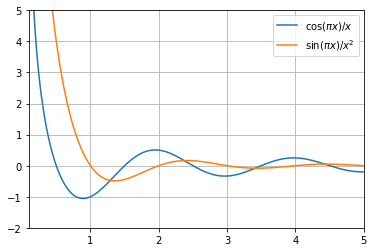

In [159]:
# Example: minimization of f(x) = x^2-3x+2

def f(x):
    return np.cos(math.pi*x)/x

def gradient_f(x):
    return np.sin(math.pi*x)/x**2

xvals = np.arange(0.1, 5, 0.01)
yvals = f(xvals)
plt.plot(xvals, yvals, label="$\cos(\pi x)/x$")
yvals2 = gradient_f(xvals)
plt.plot(xvals, yvals2, label="$\sin(\pi x)/x^2$")
plt.axis([0.1, 5, -2, 5])
plt.grid(True)
plt.legend()
plt.show()

In [160]:
print(GDA())

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1      1.00     -1.00      0.00      1.00     0.001
     2      1.00     -1.00      0.00      1.00     0.001
     3      1.00     -1.00      0.00      1.00     0.001
     4      1.00     -1.00      0.00      1.00     0.001
     5      1.00     -1.00      0.00      1.00     0.001
     6      1.00     -1.00      0.00      1.00     0.001
     7      1.00     -1.00      0.00      1.00     0.001
     8      1.00     -1.00      0.00      1.00     0.001
     9      1.00     -1.00      0.00      1.00     0.001
    10      1.00     -1.00      0.00      1.00     0.001
    11      1.00     -1.00      0.00      1.00     0.001
    12      1.00     -1.00      0.00      1.00     0.001
    13      1.00     -1.00      0.00      1.00     0.001
    14      1.00     -1.00      0.00      1.00     0.001
    15      1.00     -1.00      0.00      1.00     0.001
    16      1.00     -1.00      0.00      1.00     0.001
    17      1.00     -1.00     

   577     -6.00     -0.17      0.00      1.00     0.001
   578     -6.00     -0.17      0.00      1.00     0.001
   579     -6.00     -0.17      0.00      1.00     0.001
   580     -6.00     -0.17      0.00      1.00     0.001
   581     -6.00     -0.17      0.00      1.00     0.001
   582     -6.00     -0.17      0.00      1.00     0.001
   583     -6.00     -0.17      0.00      1.00     0.001
   584     -6.00     -0.17      0.00      1.00     0.001
   585     -6.00     -0.17      0.00      1.00     0.001
   586     -6.00     -0.17      0.00      1.00     0.001
   587     -6.00     -0.17      0.00      1.00     0.001
   588     -6.00     -0.17      0.00      1.00     0.001
   589     -6.00     -0.17      0.00      1.00     0.001
   590     -6.00     -0.17      0.00      1.00     0.001
   591     -6.00     -0.17      0.00      1.00     0.001
   592     -6.00     -0.17      0.00      1.00     0.001
   593     -6.00     -0.17      0.00      1.00     0.001
   594     -6.00     -0.17     

  1152     -6.00     -0.17      0.00      1.00     0.001
  1153     -6.00     -0.17      0.00      1.00     0.001
  1154     -6.00     -0.17      0.00      1.00     0.001
  1155     -6.00     -0.17      0.00      1.00     0.001
  1156     -6.00     -0.17      0.00      1.00     0.001
  1157     -6.00     -0.17      0.00      1.00     0.001
  1158     -6.00     -0.17      0.00      1.00     0.001
  1159     -6.00     -0.17      0.00      1.00     0.001
  1160     -6.00     -0.17      0.00      1.00     0.001
  1161     -6.00     -0.17      0.00      1.00     0.001
  1162     -6.00     -0.17      0.00      1.00     0.001
  1163     -6.00     -0.17      0.00      1.00     0.001
  1164     -6.00     -0.17      0.00      1.00     0.001
  1165     -6.00     -0.17      0.00      1.00     0.001
  1166     -6.00     -0.17      0.00      1.00     0.001
  1167     -6.00     -0.17      0.00      1.00     0.001
  1168     -6.00     -0.17      0.00      1.00     0.001
  1169     -6.00     -0.17     

  1786     -6.00     -0.17      0.00      1.00     0.001
  1787     -6.00     -0.17      0.00      1.00     0.001
  1788     -6.00     -0.17      0.00      1.00     0.001
  1789     -6.00     -0.17      0.00      1.00     0.001
  1790     -6.00     -0.17      0.00      1.00     0.001
  1791     -6.00     -0.17      0.00      1.00     0.001
  1792     -6.00     -0.17      0.00      1.00     0.001
  1793     -6.00     -0.17      0.00      1.00     0.001
  1794     -6.00     -0.17      0.00      1.00     0.001
  1795     -6.00     -0.17      0.00      1.00     0.001
  1796     -6.00     -0.17      0.00      1.00     0.001
  1797     -6.00     -0.17      0.00      1.00     0.001
  1798     -6.00     -0.17      0.00      1.00     0.001
  1799     -6.00     -0.17      0.00      1.00     0.001
  1800     -6.00     -0.17      0.00      1.00     0.001
  1801     -6.00     -0.17      0.00      1.00     0.001
  1802     -6.00     -0.17      0.00      1.00     0.001
  1803     -6.00     -0.17     

  2408     -6.00     -0.17      0.00      1.00     0.001
  2409     -6.00     -0.17      0.00      1.00     0.001
  2410     -6.00     -0.17      0.00      1.00     0.001
  2411     -6.00     -0.17      0.00      1.00     0.001
  2412     -6.00     -0.17      0.00      1.00     0.001
  2413     -6.00     -0.17      0.00      1.00     0.001
  2414     -6.00     -0.17      0.00      1.00     0.001
  2415     -6.00     -0.17      0.00      1.00     0.001
  2416     -6.00     -0.17      0.00      1.00     0.001
  2417     -6.00     -0.17      0.00      1.00     0.001
  2418     -6.00     -0.17      0.00      1.00     0.001
  2419     -6.00     -0.17      0.00      1.00     0.001
  2420     -6.00     -0.17      0.00      1.00     0.001
  2421     -6.00     -0.17      0.00      1.00     0.001
  2422     -6.00     -0.17      0.00      1.00     0.001
  2423     -6.00     -0.17      0.00      1.00     0.001
  2424     -6.00     -0.17      0.00      1.00     0.001
  2425     -6.00     -0.17     

  3002     -6.00     -0.17      0.00      1.00     0.001
  3003     -6.00     -0.17      0.00      1.00     0.001
  3004     -6.00     -0.17      0.00      1.00     0.001
  3005     -6.00     -0.17      0.00      1.00     0.001
  3006     -6.00     -0.17      0.00      1.00     0.001
  3007     -6.00     -0.17      0.00      1.00     0.001
  3008     -6.00     -0.17      0.00      1.00     0.001
  3009     -6.00     -0.17      0.00      1.00     0.001
  3010     -6.00     -0.17      0.00      1.00     0.001
  3011     -6.00     -0.17      0.00      1.00     0.001
  3012     -6.00     -0.17      0.00      1.00     0.001
  3013     -6.00     -0.17      0.00      1.00     0.001
  3014     -6.00     -0.17      0.00      1.00     0.001
  3015     -6.00     -0.17      0.00      1.00     0.001
  3016     -6.00     -0.17      0.00      1.00     0.001
  3017     -6.00     -0.17      0.00      1.00     0.001
  3018     -6.00     -0.17      0.00      1.00     0.001
  3019     -6.00     -0.17     

  3571     -6.00     -0.17      0.00      1.00     0.001
  3572     -6.00     -0.17      0.00      1.00     0.001
  3573     -6.00     -0.17      0.00      1.00     0.001
  3574     -6.00     -0.17      0.00      1.00     0.001
  3575     -6.00     -0.17      0.00      1.00     0.001
  3576     -6.00     -0.17      0.00      1.00     0.001
  3577     -6.00     -0.17      0.00      1.00     0.001
  3578     -6.00     -0.17      0.00      1.00     0.001
  3579     -6.00     -0.17      0.00      1.00     0.001
  3580     -6.00     -0.17      0.00      1.00     0.001
  3581     -6.00     -0.17      0.00      1.00     0.001
  3582     -6.00     -0.17      0.00      1.00     0.001
  3583     -6.00     -0.17      0.00      1.00     0.001
  3584     -6.00     -0.17      0.00      1.00     0.001
  3585     -6.00     -0.17      0.00      1.00     0.001
  3586     -6.00     -0.17      0.00      1.00     0.001
  3587     -6.00     -0.17      0.00      1.00     0.001
  3588     -6.00     -0.17     

  4124     -6.00     -0.17      0.00      1.00     0.001
  4125     -6.00     -0.17      0.00      1.00     0.001
  4126     -6.00     -0.17      0.00      1.00     0.001
  4127     -6.00     -0.17      0.00      1.00     0.001
  4128     -6.00     -0.17      0.00      1.00     0.001
  4129     -6.00     -0.17      0.00      1.00     0.001
  4130     -6.00     -0.17      0.00      1.00     0.001
  4131     -6.00     -0.17      0.00      1.00     0.001
  4132     -6.00     -0.17      0.00      1.00     0.001
  4133     -6.00     -0.17      0.00      1.00     0.001
  4134     -6.00     -0.17      0.00      1.00     0.001
  4135     -6.00     -0.17      0.00      1.00     0.001
  4136     -6.00     -0.17      0.00      1.00     0.001
  4137     -6.00     -0.17      0.00      1.00     0.001
  4138     -6.00     -0.17      0.00      1.00     0.001
  4139     -6.00     -0.17      0.00      1.00     0.001
  4140     -6.00     -0.17      0.00      1.00     0.001
  4141     -6.00     -0.17     

  4739     -6.00     -0.17      0.00      1.00     0.001
  4740     -6.00     -0.17      0.00      1.00     0.001
  4741     -6.00     -0.17      0.00      1.00     0.001
  4742     -6.00     -0.17      0.00      1.00     0.001
  4743     -6.00     -0.17      0.00      1.00     0.001
  4744     -6.00     -0.17      0.00      1.00     0.001
  4745     -6.00     -0.17      0.00      1.00     0.001
  4746     -6.00     -0.17      0.00      1.00     0.001
  4747     -6.00     -0.17      0.00      1.00     0.001
  4748     -6.00     -0.17      0.00      1.00     0.001
  4749     -6.00     -0.17      0.00      1.00     0.001
  4750     -6.00     -0.17      0.00      1.00     0.001
  4751     -6.00     -0.17      0.00      1.00     0.001
  4752     -6.00     -0.17      0.00      1.00     0.001
  4753     -6.00     -0.17      0.00      1.00     0.001
  4754     -6.00     -0.17      0.00      1.00     0.001
  4755     -6.00     -0.17      0.00      1.00     0.001
  4756     -6.00     -0.17     

  5288     -6.00     -0.17      0.00      1.00     0.001
  5289     -6.00     -0.17      0.00      1.00     0.001
  5290     -6.00     -0.17      0.00      1.00     0.001
  5291     -6.00     -0.17      0.00      1.00     0.001
  5292     -6.00     -0.17      0.00      1.00     0.001
  5293     -6.00     -0.17      0.00      1.00     0.001
  5294     -6.00     -0.17      0.00      1.00     0.001
  5295     -6.00     -0.17      0.00      1.00     0.001
  5296     -6.00     -0.17      0.00      1.00     0.001
  5297     -6.00     -0.17      0.00      1.00     0.001
  5298     -6.00     -0.17      0.00      1.00     0.001
  5299     -6.00     -0.17      0.00      1.00     0.001
  5300     -6.00     -0.17      0.00      1.00     0.001
  5301     -6.00     -0.17      0.00      1.00     0.001
  5302     -6.00     -0.17      0.00      1.00     0.001
  5303     -6.00     -0.17      0.00      1.00     0.001
  5304     -6.00     -0.17      0.00      1.00     0.001
  5305     -6.00     -0.17     

  5753     -6.00     -0.17      0.00      1.00     0.001
  5754     -6.00     -0.17      0.00      1.00     0.001
  5755     -6.00     -0.17      0.00      1.00     0.001
  5756     -6.00     -0.17      0.00      1.00     0.001
  5757     -6.00     -0.17      0.00      1.00     0.001
  5758     -6.00     -0.17      0.00      1.00     0.001
  5759     -6.00     -0.17      0.00      1.00     0.001
  5760     -6.00     -0.17      0.00      1.00     0.001
  5761     -6.00     -0.17      0.00      1.00     0.001
  5762     -6.00     -0.17      0.00      1.00     0.001
  5763     -6.00     -0.17      0.00      1.00     0.001
  5764     -6.00     -0.17      0.00      1.00     0.001
  5765     -6.00     -0.17      0.00      1.00     0.001
  5766     -6.00     -0.17      0.00      1.00     0.001
  5767     -6.00     -0.17      0.00      1.00     0.001
  5768     -6.00     -0.17      0.00      1.00     0.001
  5769     -6.00     -0.17      0.00      1.00     0.001
  5770     -6.00     -0.17     

  6227     -6.00     -0.17      0.00      1.00     0.001
  6228     -6.00     -0.17      0.00      1.00     0.001
  6229     -6.00     -0.17      0.00      1.00     0.001
  6230     -6.00     -0.17      0.00      1.00     0.001
  6231     -6.00     -0.17      0.00      1.00     0.001
  6232     -6.00     -0.17      0.00      1.00     0.001
  6233     -6.00     -0.17      0.00      1.00     0.001
  6234     -6.00     -0.17      0.00      1.00     0.001
  6235     -6.00     -0.17      0.00      1.00     0.001
  6236     -6.00     -0.17      0.00      1.00     0.001
  6237     -6.00     -0.17      0.00      1.00     0.001
  6238     -6.00     -0.17      0.00      1.00     0.001
  6239     -6.00     -0.17      0.00      1.00     0.001
  6240     -6.00     -0.17      0.00      1.00     0.001
  6241     -6.00     -0.17      0.00      1.00     0.001
  6242     -6.00     -0.17      0.00      1.00     0.001
  6243     -6.00     -0.17      0.00      1.00     0.001
  6244     -6.00     -0.17     

  6694     -6.00     -0.17      0.00      1.00     0.001
  6695     -6.00     -0.17      0.00      1.00     0.001
  6696     -6.00     -0.17      0.00      1.00     0.001
  6697     -6.00     -0.17      0.00      1.00     0.001
  6698     -6.00     -0.17      0.00      1.00     0.001
  6699     -6.00     -0.17      0.00      1.00     0.001
  6700     -6.00     -0.17      0.00      1.00     0.001
  6701     -6.00     -0.17      0.00      1.00     0.001
  6702     -6.00     -0.17      0.00      1.00     0.001
  6703     -6.00     -0.17      0.00      1.00     0.001
  6704     -6.00     -0.17      0.00      1.00     0.001
  6705     -6.00     -0.17      0.00      1.00     0.001
  6706     -6.00     -0.17      0.00      1.00     0.001
  6707     -6.00     -0.17      0.00      1.00     0.001
  6708     -6.00     -0.17      0.00      1.00     0.001
  6709     -6.00     -0.17      0.00      1.00     0.001
  6710     -6.00     -0.17      0.00      1.00     0.001
  6711     -6.00     -0.17     

KeyboardInterrupt: 